# Práctica 2: Sistemas y Convolución

In [21]:
# imports
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget


## Sistemas

### Ejercicio 1:
Para cada uno de los siguientes sistemas determine si son causales, lineales, invariantes en el tiempo y si poseen memoria. En cada caso grafique la salida del sistema $y[n]$ para una entrada dada.

1. $ y[n] = g[n]x[n]$ , donde $g[n] = A sin( \omega n T)$ siendo A constante, $ω = 2 \pi f$ y T el período de muestreo.

a

2. $ y[n] = \sum_{k= n - n_0}^{n + n_0} x[k] $

a

3. $ y[n] = x[n] + 2 $

a

4. $ y[n] = nx[n] $

a


### Ejercicio 2: 
Considere el diagrama en bloques de la Figura 1 y encuentre la ecuación en diferencias para la señal de salida $y[n]$ en función de la señal de entrada $x[n]$

La ecuación del sistema de la figura es 

$$a $$

### Ejercicio 3:
Considere el sistema LTI dado por la ecuación en diferencias $ y[n] − 0,5 y[n−1] + 0, 25 y[n−2] = x[n] $ inicialmente en reposo. Encuentre el diagrama en bloques que lo representa.

### Ejercicio 4:
Encuentre la respuesta al impulso de los sistemas LTI causales descriptos por las siguientes ecuaciones en diferencias y clasifíquelos en función de ésta. Utilice condiciones iniciales nulas.

Clasificación según la respuesta al impulso:
- Respuesta finita al impulso (FIR): pasado cierto tiempo el sistema se vuelve a cero.
- Respuesta infinita al impulso (IIR): la respuesta al impulso del sistema nunca se agota. Se debe generalmente a que la salida depende de salidas anteriores no nulas, y esto se repite indefinidamente.

1. $ y[n] − y[n − 2] = x[n] $
2. $ y[n] = x[n] + 0,5x[n − 1] $
3. $ y[n] − 0,5y[n − 1] + 0,25y[n − 2] = x[n] $


## Convolución

### Ejercicio 1
Implemente la convolución lineal mediante una sumatoria de convolución. Pruébela para convolucionar dos señales cualesquiera de longitud N muestras. Compare los resultados con los obtenidos mediante la función $conv(x,y)$ y con la función $filter$.

La función $ Y = filter(B,A,X) $ implementa la ecuación en diferencias, para los coeficientes dados en los vectores A y B y la señal de entrada X, según:

$ a(1)*y(n) = b(1)*x(n) + b(2)*x(n-1) + ... - a(2)*y(n-1) - ... $

A partir de esto, determine los valores a ingresar en los vectores A y B para obtener la salida esperada.

#### Convolución Lineal:

Convolución discreta o sumatoria de convolución
$$ y[n] = \sum_{i = 0}^{N - 1} x[i] h[k-i]$$

In [34]:
# Convolución Lineal

def  linear_conv(x,h):
  n_c = len(x)+len(h)-1
  conv=np.zeros(n_c)
  for i in range(len(h)):
    aux = 0
    for k in range (len(x)):
      print("i:",i,"- k:",k)
      aux = x[k]*h[i]
      conv[i+k] = conv[i+k]+aux
  return conv

i: 0 - k: 0
i: 0 - k: 1
i: 0 - k: 2
i: 1 - k: 0
i: 1 - k: 1
i: 1 - k: 2
i: 2 - k: 0
i: 2 - k: 1
i: 2 - k: 2
i: 3 - k: 0
i: 3 - k: 1
i: 3 - k: 2
conv lineal entre x1 y x2 [ 2.   7.  11.   8.5  3.   1. ]


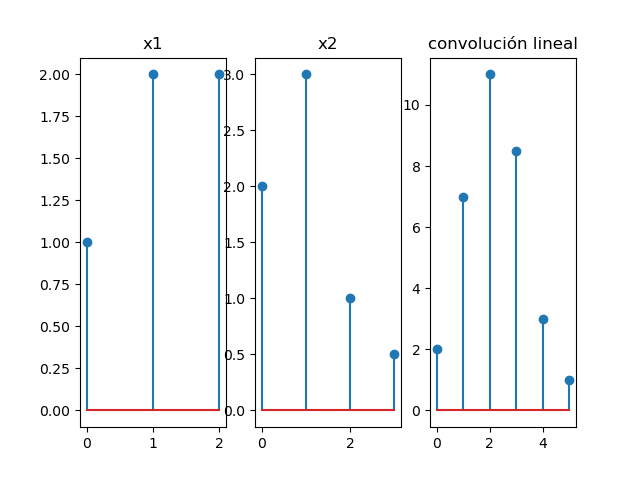

In [37]:
#Prueba
x1 = [1, 2, 2]; x2 = [2, 3, 1, 0.5]
conv = linear_conv(x1, x2)

plt.close('all')
fig, axs = plt.subplots(1, 3)
axs[0].stem(x1); axs[0].title.set_text('x1')
axs[1].stem(x2); axs[1].title.set_text('x2')
axs[2].stem(conv); axs[2].title.set_text('convolución lineal')

print("conv lineal entre x1 y x2", conv)

### Ejercicio 2:
Escriba una función que realice la convolución circular discreta (tambien llamada convolución periódica) entre dos señales $x[n]$ y $h[n]$, ambas de longitud longitud N muestras, utilizando ciclos for. En ésta se debe considerar a $x[n]$ periódica, pero $ h[n] $ debe ser nula fuera de su rango de definición. La convolución circular se puede expresar mediante la siguiente ecuación:

$$ y[k] = \sum_{l = 1}^{N} h[l]x[((N + k − l)modN) + 1] $$

para $ 1 ≤ k ≤ N $, donde $mod$ es la operación módulo entero (resto de la división entera).

In [58]:
def circ_conv(x,h):
  n = len(x)
  conv = np.zeros(n)
  for i in range(n):
    aux = 0
    for k in range(n):
      aux = x[np.mod(k+n-i,n)]*h[k]
      conv[i]= conv[i] + aux
  return conv

indice x 0
indice x 1
indice x 2
indice x 3
indice x 3
indice x 0
indice x 1
indice x 2
indice x 2
indice x 3
indice x 0
indice x 1
indice x 1
indice x 2
indice x 3
indice x 0
conv lineal entre x1 y x2 [3.  5.  6.5 3. ]


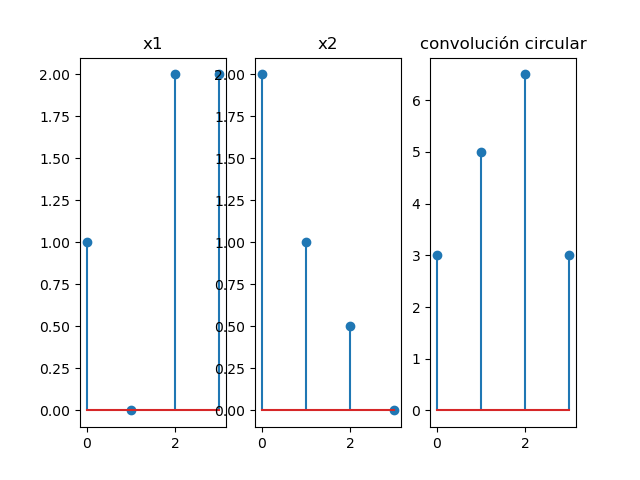

In [49]:
#Prueba
x1 = [1, 0, 2, 2]; x2 = [2, 1, 0.5, 0]
conv = circ_conv(x1, x2)

plt.close('all')
fig, axs = plt.subplots(1, 3)
axs[0].stem(x1); axs[0].title.set_text('x1')
axs[1].stem(x2); axs[1].title.set_text('x2')
axs[2].stem(conv); axs[2].title.set_text('convolución circular')

print("conv lineal entre x1 y x2", conv)

### Ejercicio 3

Considere dos sistemas LTI conectados en cascada (Figura 2), con respuestas al impulso dadas por $h_A[n] = sin(8n)$ y $h_B[n] = a^n $ , donde $ a ∈ R $ , $ |a| < 1 $ y $ 0 \leq n \leq N − 1 $, con N el número de muestras distintas de cero. Obtenga N muestras de las respuestas al impulso, $h_A$ y $h_B$, según las definiciones dadas, y determine la salida $y[n]$ para una entrada $x[n] = δ[n] − a\delta[n − 1] $, siendo $\delta[n]$ es la función de impulso unitario. Luego invierta
el orden de conexión de los sistemas y vuelva a calcular la salida. Compare con la salida obtenida originalmente.

entrada [ 1.  -0.5  0.   0.   0.   0.   0.   0. ]
respuesta impulso A: [ 0.          0.98935825 -0.28790332 -0.90557836  0.55142668  0.74511316
 -0.76825466 -0.521551  ]
respuesta impulso B: [1.        0.5       0.25      0.125     0.0625    0.03125   0.015625
 0.0078125]
PRUEBA 1
conv x con impulso a [ 0.          0.98935825 -0.78258244 -0.7616267   1.00421586  0.46939982
 -1.14081124 -0.13742367  0.2607755   0.          0.          0.
  0.          0.          0.        ]
conv de x con impulso a, con b: salida del sistema [ 0.          0.98935825 -0.28790332 -0.90557836  0.55142668  0.74511316
 -0.76825466 -0.521551    0.         -0.00386468  0.00112462  0.00353742
 -0.00215401 -0.0029106   0.00300099  0.00203731  0.          0.
  0.          0.          0.          0.        ]
PRUEBA 2
conv x con impulso b [ 1.          0.          0.          0.          0.          0.
  0.          0.         -0.00390625  0.          0.          0.
  0.          0.          0.        ]
conv de x c

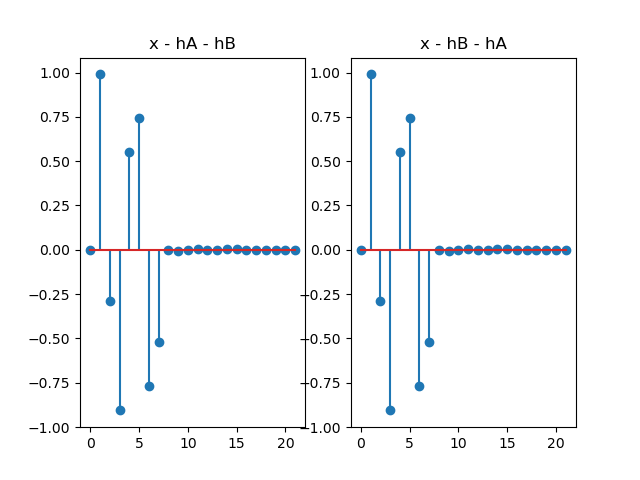

In [67]:
def h_A(N):
    n = np.arange(0,N,1)
    return np.sin(8*n)

def h_B(N,a):
    n = np.arange(0,N,1)
    return np.power(a,n)


a = 0.5
N = 8
x = np.zeros(N)
delta = np.zeros(N); delta[0] = 1
for n in range(len(delta)):
    aux = 0
    if(n-1 >= 0 ):
        aux = delta[n-1]
    x[n] = delta[n] - a * aux
print("entrada",x)

h_a = h_A(N)
h_b = h_B(N,a)
print('respuesta impulso A:',h_a)
print('respuesta impulso B:',h_b)

print("PRUEBA 1")
conv_x_a = np.convolve(x,h_a)
print("conv x con impulso a",conv_x_a)

conv_a_b = np.convolve(conv_x_a,h_b)
print("conv de x con impulso a, con b: salida del sistema",conv_a_b)


print("PRUEBA 2")

conv_x_b = np.convolve(x,h_b)
print("conv x con impulso b",conv_x_b)

conv_b_a = np.convolve(conv_x_b,h_a)
print("conv de x con impulso b, con a: salida del sistema",conv_b_a)

plt.close('all')
fig, axs = plt.subplots(1, 2)
axs[0].stem(conv_a_b); axs[0].title.set_text('x - hA - hB')
axs[1].stem(conv_b_a); axs[1].title.set_text('x - hB - hA')